In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle

import warnings
warnings.filterwarnings('ignore')

file_path = '/content/gdrive/MyDrive/Credit Card Fraud Detection'
if os.path.exists(file_path):
  print("Success")
csv_path = os.path.join(file_path, 'creditcard.csv')

Success


In [ ]:
data = pd.read_csv(csv_path)
#print(data.columns)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

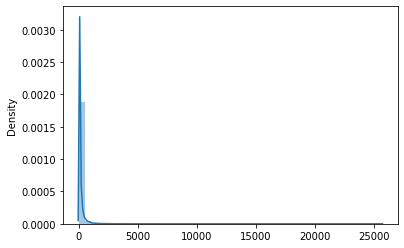

In [ ]:
amount = [data['Amount'].values]
sns.distplot(amount)

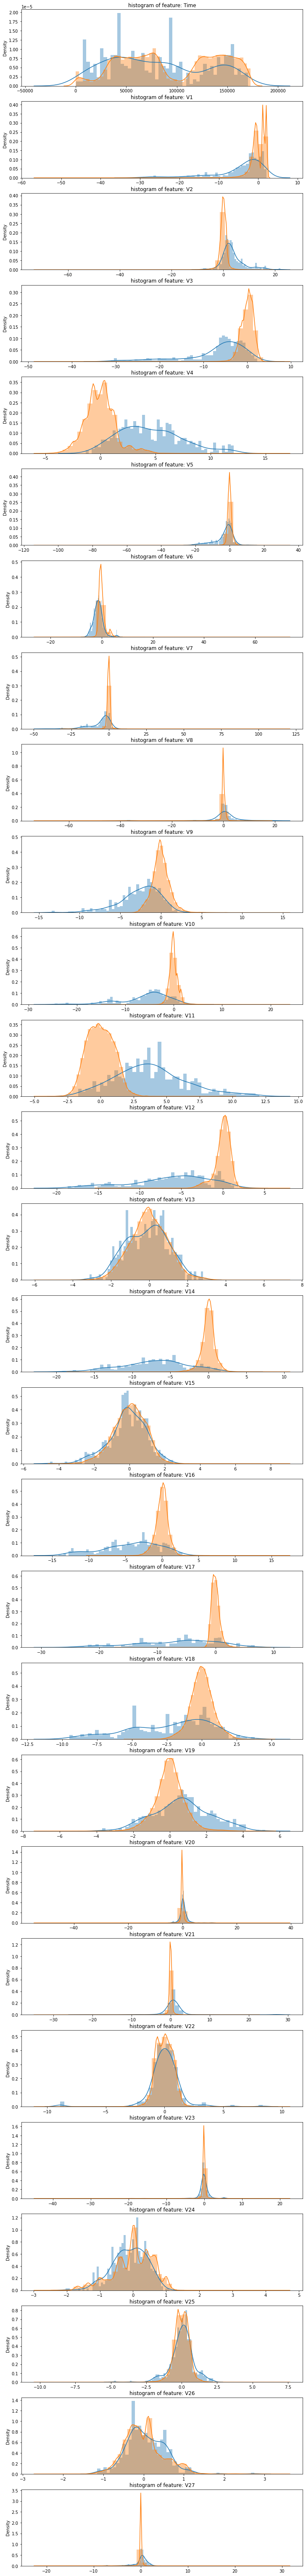

In [ ]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [ ]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print("Amount details of fradulent transacation")
Fraud.Amount.describe()

Amount details of fradulent transacation


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("Amount details of valid transaction")
Valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

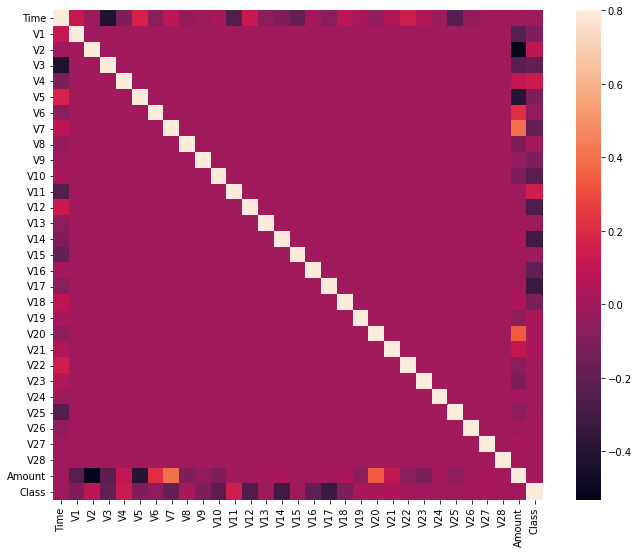

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
#seperating the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
X=X.drop(['Time'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 29)
(284807,)


In [ ]:
X_data

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [ ]:
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)


# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y_test).sum()

the Model used is Isolation Forest
The accuracy is  0.9977879990168884
The precision is 0.34444444444444444
The recall is 0.3163265306122449
The F1-Score is 0.32978723404255317
The Matthews correlation coefficient is0.3289803888639235


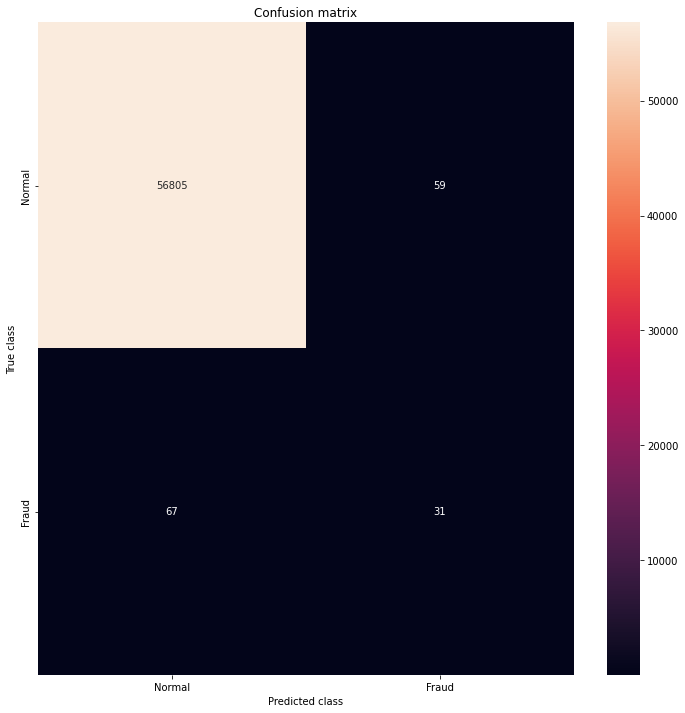

Isolation Forest: 126
0.9977879990168884


<Figure size 648x504 with 0 Axes>

In [ ]:
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))

In [ ]:
X_test

array([[-1.65265066e+01,  8.58497180e+00, -1.86498532e+01, ...,
        -2.01857525e+00, -1.04280417e+00,  3.64190000e+02],
       [ 3.39812064e-01, -2.74374524e+00, -1.34069511e-01, ...,
         4.09958027e-02,  1.02037825e-01,  5.20120000e+02],
       [ 1.39959027e+00, -5.90701288e-01,  1.68618940e-01, ...,
         1.14086454e-02,  4.63414166e-03,  3.10000000e+01],
       ...,
       [ 4.04414982e-02, -1.09736789e-01, -1.26642984e+00, ...,
         3.57844730e-01,  3.54379443e-01,  7.63000000e+00],
       [-4.95047586e-01,  9.91480934e-01,  1.67158401e+00, ...,
         4.05292111e-02, -2.69775457e-01,  3.59000000e+00],
       [-1.59048567e+00,  9.92415466e-01, -5.12841392e-01, ...,
         1.25749856e-01, -6.07225509e-01,  9.06310000e+02]])

In [ ]:
X_test.shape

(56962, 29)

The model used is Random Forest classifier
The accuracy is  0.9977879990168884
The precision is 0.34444444444444444
The recall is 0.3163265306122449
The F1-Score is 0.32978723404255317
The Matthews correlation coefficient is 0.3289803888639235


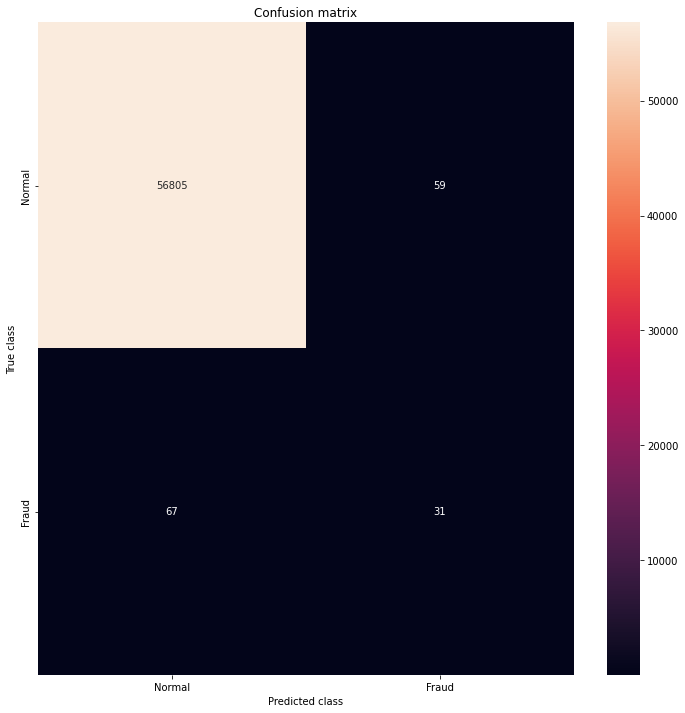

Random Forest: 126
0.9977879990168884
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.32      0.33        98

    accuracy                           1.00     56962
   macro avg       0.67      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [ ]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
# n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

In [ ]:
feature_list = list(X.columns)
# Import tools needed for visualization
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydot

# #pulling out one tree from the forest
# tree = rfc.estimators_[5]
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# display(Image(graph.create_png()))

In [ ]:
# my_test_value = input("Enter test data as 2d array: ")
# my_test_value = my_test_value.split(',')
# my_test_value = np.array(my_test_value)
# my_test_value = my_test_value.astype(np.float)
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
# y_pred = rfc.predict([my_test_value])
# y_pred

In [ ]:
my_test_value = input("Enter test data as 2d array: ")
my_test_value = my_test_value.split(',')
my_test_value = np.array(my_test_value)
my_test_value = my_test_value.astype(np.float)

loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict([my_test_value])
if y_pred[0] == 1:
    print("[Info] Fraud detected")
else:
    print("[Info] Not fraud")

In [ ]:
import requests
from threading import Thread
my_test_value = input("Enter test data as 2d array: ")
my_test_value = my_test_value.split(',')
my_test_value = np.array(my_test_value)
my_test_value = my_test_value.astype(np.float)

def threaded_request(msg):
    resp = requests.post(url=' https://71a3d0616018.ngrok.io/send_mail', json=msg)
    print(resp.status_code)
    print(resp.json())

def request_to_server(msg):
    Thread(target=threaded_request, args=(msg, )).start()

loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
y_pred = loaded_model.predict([my_test_value])
if y_pred[0] == 1:
    print("[Info] Fraud detected")
    request_to_server({'info': 'fraud_detected'})
    
else:
    print("[Info] Not fraud")


Enter test data as 2d array: [0.682788894522416]


ValueError: ignored